In [12]:
## First step 
## Download the hungarian games corpus to a specific location
## Later, execute the code in sequence 
## This program reads each textgrid file and creates a new words file with three columns specifying start, end and words uttered by the speaker.
## The program reads the .TextGrid file from each folder and creates a new words file with the extension .words
## For instance, s01.objects.1.A.words.TextGrid will be processed, and the new file will be created on the same path with s01.objects.1.A.words

import os
import sys
import glob
import os.path
import pandas as pd
import re
import textgrid
import numpy as np

list_of_files = glob.glob(r'D:\Jay\hungarian_games_corpus\dataset\**\*.TextGrid',recursive=True)
for file_name in list_of_files:    
    out_name=file_name[:-9]+'.txt'
    tgrid = textgrid.read_textgrid(file_name)
    df1=pd.DataFrame(tgrid)
    df1 = df1[(df1["tier"]=='SPK1') | (df1["tier"]=='SPK2')]
    spa2=df1.sort_values(['start'])
    spa2['name'] = spa2['name'].str.replace(r"\<.*\>","")
    spa2['name'].replace('', np.nan, inplace=True)    
    spa3=spa2[spa2["name"].str.contains("np.nan")==False]
    spa3[['start', 'stop']] = spa2[['start', 'stop']].astype(str)
    spa3['obj1_count'] = (spa3['tier'].ne(spa3['tier'].shift())).cumsum()
    df3=spa3.groupby('obj1_count').agg(lambda x: ' '.join(x))
    df3['start'] = df3['start'].map(lambda x: x.split(" ")[0])
    df3['stop'] = df3['stop'].map(lambda x: x.split(" ")[-1])
    df3['tier'] = df3['tier'].map(lambda x: x.split(" ")[-1])
    basename = os.path.basename(file_name)
    file_name = os.path.splitext(basename)[0]
    df3['File_name'] = file_name
    df3['File_name']=df3['File_name'].str.replace("_q_acc",".wav")
    df3.to_csv(out_name, index=False,header=False,sep='\t')
    del tgrid, df3


C:\Users\kejri\AppData\Local\Temp\ipykernel_4956\2935828665.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  spa2['name'] = spa2['name'].str.replace(r"\<.*\>","")
C:\Users\kejri\AppData\Local\Temp\ipykernel_4956\2935828665.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spa3[['start', 'stop']] = spa2[['start', 'stop']].astype(str)
C:\Users\kejri\AppData\Local\Temp\ipykernel_4956\2935828665.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spa3['o

In [13]:
#Second step 
## The program reads each file generated in the first step and combines the text files of both speakers in each session.
## For instance, s01.objects.1.A.words_with_speaker and s01.objects.1.B.words_with_speaker will be read and combined. 
## The program also converts each wav file sample rate to 16khz
## For instance, s01.objects.1.A.wav will be transformed to s01.objects.1.A.wav with sample rate 16k

#Program to merge Speaker text files and convert flac files
import os
import fnmatch
import sys
import subprocess
import glob

# Build input path for wav files
list_of_wav_files = sorted(glob.glob(r'D:\Jay\hungarian_games_corpus\dataset\**\*.wav',recursive=True))
# Build input path for text files
object_text = sorted(glob.glob(r'D:\Jay\hungarian_games_corpus\dataset\**\*.txt',recursive=True))
#Specify output path
new_path_resampled = r'D:\Jay\hungarian_games_corpus\dataset\bgc-17wav_new'

def merge_files(infiles):
    for i in range(0, len(infiles)-2,3):
        output=os.path.basename(infiles[i][:-14])+'.txt'
        outfiletxt = os.path.join(new_path_resampled, output)
        with open(outfiletxt, 'wb') as fo:
            with open(infiles[i], 'rb') as fi:
                fo.write(fi.read())
            with open(infiles[i+1], 'rb') as fi:
                fo.write(fi.read())
            with open(infiles[i+2], 'rb') as fi:
                fo.write(fi.read())

def resample_wavfiles(infiles):
    for i in range(0, len(infiles)):
        output1=os.path.basename(infiles[i])
        print("processing file", output1)
        outfile2 = os.path.join(new_path_resampled, output1)
        ffp=r"C:\ffmpeg-master-latest-win64-gpl\bin\ffmpeg"
        cmd2wav2 = ffp+' -i ' + infiles[i] + ' ' + "-ac 1" + ' ' + "-ar 16000" + ' ' + outfile2
        print(cmd2wav2)
        subprocess.call(cmd2wav2, shell=True)
    



# Merge
resample_wavfiles(list_of_wav_files)
merge_files(object_text)

processing file gr1_game1_bl1.wav
C:\ffmpeg-master-latest-win64-gpl\bin\ffmpeg -i D:\Jay\hungarian_games_corpus\dataset\Budapest_GamesCorpus_36wav\gr1_game1_bl1.wav -ac 1 -ar 16000 D:\Jay\hungarian_games_corpus\dataset\bgc-17wav_new\gr1_game1_bl1.wav
processing file gr1_game1_bl2.wav
C:\ffmpeg-master-latest-win64-gpl\bin\ffmpeg -i D:\Jay\hungarian_games_corpus\dataset\Budapest_GamesCorpus_36wav\gr1_game1_bl2.wav -ac 1 -ar 16000 D:\Jay\hungarian_games_corpus\dataset\bgc-17wav_new\gr1_game1_bl2.wav
processing file gr1_game1_bl3.wav
C:\ffmpeg-master-latest-win64-gpl\bin\ffmpeg -i D:\Jay\hungarian_games_corpus\dataset\Budapest_GamesCorpus_36wav\gr1_game1_bl3.wav -ac 1 -ar 16000 D:\Jay\hungarian_games_corpus\dataset\bgc-17wav_new\gr1_game1_bl3.wav
processing file gr1_game2_bl1.wav
C:\ffmpeg-master-latest-win64-gpl\bin\ffmpeg -i D:\Jay\hungarian_games_corpus\dataset\Budapest_GamesCorpus_36wav\gr1_game2_bl1.wav -ac 1 -ar 16000 D:\Jay\hungarian_games_corpus\dataset\bgc-17wav_new\gr1_game2_bl1.

In [14]:
#Third step 
## Program to delete unwanted files
## The program deletes all unwanted files generated during pre-processing in previous steps
## The program allows better readability of the generated output

import glob

#Delete files with unwanted extension
for f in glob.glob(r'D:\Jay\hungarian_games_corpus\dataset\Budapest_GamesCorpus_nonfinaltg36\*.txt',recursive=True):
    os.remove(f)

In [2]:
#Fourth step 
## Program to extract textual, semantic and auditory embeddings from each turn
## The program reads each text file generated in the third step and extracts text, TRILL vectors and semantic embeddings from each turn
## The program saves embeddings in pkl file format
import pandas as pd
from sentence_transformers import SentenceTransformer, util
from transformers import BertTokenizer, BertModel
import torch
from functools import reduce
import csv
from sklearn.metrics.pairwise import cosine_similarity
import random
import subprocess
import re
import glob
import os,sys
import numpy as np
import soundfile as sf
import wave
import json
import tensorflow as tf1
import tensorflow_hub as hub
import tensorflow.compat.v2 as tf
from sklearn.metrics.pairwise import cosine_similarity
modulev3=None
modulev3_graph=None
import pickle
tf.enable_v2_behavior()
assert tf.executing_eagerly()

##Function to load TRILL vector model      
def get_TRILLv3_signal(signal,samplerate):
    global modulev3
    if modulev3==None:
        #Specify the path of TRILL vector model
        print('******************\nLoading model ...\n******************')    
        modulev3 = hub.load(r'D:\Jay\columbia-games-corpus\trill_extraction_v2\v3')
    
    
    max_int16 = 2**15
    chunks_cnt=int(signal.shape[0]/(samplerate*10.0))#10 seconds max in chunk
    if chunks_cnt==0:
        chunks=[signal]
    else:
        chunks=np.array_split(signal, chunks_cnt)
    
    trillv3_emb_all=np.empty(shape=(0,512))
    
    for chunk in chunks:
        trillv3 = modulev3(samples=chunk, sample_rate=samplerate)
        trillv3_emb = trillv3['embedding']
        trillv3_emb_all=np.concatenate((trillv3_emb_all, trillv3_emb))

    trillv3_emb_avg = np.mean(trillv3_emb_all, axis=0, keepdims=False)

    return (trillv3_emb_avg.tolist())    

##Function to check if audio files are in proper format 
def check_wav_format(wav_file, start, end):
    wf = wave.open(wav_file)
    nchannels, sampwidth, framerate, nframes, comptype, compname = wf.getparams()
    print(nchannels, sampwidth, framerate, nframes, comptype, compname)
    wav_length = float(nframes) / float(framerate)
    print(wav_length)		
    return(framerate)

##Function to extract TRILL embeddings from specific file name with start and end time as parameters   
def get_TRILLv3_audiofile_from_to(wav_file,start,end):
    print('get_TRILLv3_signal:',wav_file,start,end)
    samplerate=check_wav_format(wav_file, start, end)   
    startsample=int(start*samplerate)
    endsample=int(end*samplerate)
    signal, samplerate = sf.read(wav_file,start=startsample, stop=endsample)
    print(len(signal),samplerate)    

    trill=get_TRILLv3_signal(signal,samplerate)
    return(trill)

##Specify input path from where text files needs to be read
#Specify path for files generated in second step
path = r'D:\Jay\hungarian_games_corpus\dataset'
#Specify path where auditory embeddings needs to be saved
audio_embedding_path = 'D:\\Jay\\hungarian_games_corpus\\Pickle\\audio\\'
#Specify path where text embeddings needs to be saved
text_embedding_path = 'D:\\Jay\\hungarian_games_corpus\\Pickle\\text\\'
#Specify path where semantic embeddings needs to be saved
semantic_embedding_path = 'D:\\Jay\\hungarian_games_corpus\\Pickle\\semantic\\'
#Initialize transformer model for semantic feature extraction
model = SentenceTransformer('NYTK/sentence-transformers-experimental-hubert-hungarian')


for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(root, file), 'r', encoding="utf8") as f:
                out_audio_embedding= os.path.join(audio_embedding_path, os.path.basename(file))
                out_semantic_embedding= os.path.join(semantic_embedding_path, os.path.basename(file))
                out_text_embedding= os.path.join(text_embedding_path, os.path.basename(file))
                sentenceembeddings=[]
                audioembeddings = []
                sentence_embeddings_tensor = []
                text = f.readlines()
                for line in text:
                    n1=line.split('\t')[0]
                    n2=line.split('\t')[1]
                    sentence=line.split('\t')[2]
                    n3=line.split('\t')[4]
                    n4=os.path.join(root,n3).replace('\n','')
                    x=get_TRILLv3_audiofile_from_to(n4,float(n1),float(n2))
                    sentenceembeddings.append(sentence)
                    audioembeddings.append(x)
                sentence_embeddings_tensor = model.encode(sentenceembeddings, convert_to_tensor=False)
                sentence_embeddings_tensor=sentence_embeddings_tensor.tolist()
                with open(out_audio_embedding+'.pkl', 'wb') as f:
                    pickle.dump(audioembeddings, f)
                with open(out_text_embedding+'.pkl', 'wb') as f:
                    pickle.dump(sentenceembeddings, f)
                with open(out_semantic_embedding+'.pkl', 'wb') as f:
                    pickle.dump(sentence_embeddings_tensor, f)

get_TRILLv3_signal: D:\Jay\hungarian_games_corpus\dataset\bgc-17wav_new\gr2_game2_bl1.wav 0.0 9.98
1 2 16000 8077572 NONE not compressed
504.84825
159680 16000
******************
Loading model ...
******************
get_TRILLv3_signal: D:\Jay\hungarian_games_corpus\dataset\bgc-17wav_new\gr2_game2_bl1.wav 9.809924768876941 10.977927180236758
1 2 16000 8077572 NONE not compressed
504.84825
18688 16000
get_TRILLv3_signal: D:\Jay\hungarian_games_corpus\dataset\bgc-17wav_new\gr2_game2_bl1.wav 18.310000000000002 72.50999999999999
1 2 16000 8077572 NONE not compressed
504.84825
867199 16000
get_TRILLv3_signal: D:\Jay\hungarian_games_corpus\dataset\bgc-17wav_new\gr2_game2_bl1.wav 71.56 76.27000000000001
1 2 16000 8077572 NONE not compressed
504.84825
75360 16000
get_TRILLv3_signal: D:\Jay\hungarian_games_corpus\dataset\bgc-17wav_new\gr2_game2_bl1.wav 75.66999999999999 88.43
1 2 16000 8077572 NONE not compressed
504.84825
204161 16000
get_TRILLv3_signal: D:\Jay\hungarian_games_corpus\dataset\bg

In [4]:
#Fifth step 
## Program to measure lexical and syntactic entrainment
## The program takes two turns as input and provides cosine similarity as output
# ------------------------------------------------------------------------
# Name : Syntactic_and_Lexical_similarity_hu.py
# Author : Jay Kejriwal
# Date   : 21-03-2022
# Description : Program to measure lexical and syntactic similarity between two sentences
# ------------------------------------------------------------------------

import stanza
import re
import math
from collections import Counter
import nltk
from nltk.util import ngrams
nlp = stanza.Pipeline(lang='hu', processors='tokenize,pos,lemma')

def get_cosine(vec1, vec2):      #Function to measure cosine similarity
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return -1
    else:
        return float(numerator) / denominator

def text_to_vector(text,ngram):  #Function to measure lexical similarities in sentence
    n_grams = ngrams(nltk.word_tokenize(text), ngram)
    new_sequence1 =  [ ' '.join(grams) for grams in n_grams]
    return Counter(new_sequence1)


def process_lex_text(text):         #Function to remove punctuation and extrat lemma and pos
    words = re.sub(r'[.,"\-?:!;]', '', text.lower())
    doc = nlp(words)
    x=[f'{word.lemma}' for sent in doc.sentences for word in sent.words]
    return ' '.join([str(elem) for elem in x])


def process_syn_text(text):         #Function to remove punctuation and extrat lemma and pos
    words = re.sub(r'[.,"\-?:!;]', '', text.lower())
    doc = nlp(words)
    l=[f'{word.upos}' for sent in doc.sentences for word in sent.words]
    return ' '.join([str(elem) for elem in l])

def calculate_lexical_similarity(text1, text2):
    process1 = process_lex_text(text1)
    process2 = process_lex_text(text2)
    vector1 = text_to_vector(process1,ngram=1)
    vector2 = text_to_vector(process2,ngram=1)
    cosine = get_cosine(vector1, vector2)
    return cosine

def calculate_syntactic_similarity(text1, text2):
    process1 = process_syn_text(text1)
    process2 = process_syn_text(text2)
    vector1 = text_to_vector(process1,ngram=2)
    print(vector1)
    vector2 = text_to_vector(process2,ngram=2)
    print(vector2)
    cosin = get_cosine(vector1, vector2)
    return cosin

text1 = "jaj. ja, hogy el ̋obb fel kellett volna sorolnom a,"
text2 = "malom tábla."

# print(calculate_lexical_similarity(text1, text2))
print(calculate_syntactic_similarity(text1, text2))

2023-12-28 17:10:33 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-12-28 17:10:33 INFO: Loading these models for language: hu (Hungarian):
| Processor | Package |
-----------------------
| tokenize  | szeged  |
| pos       | szeged  |
| lemma     | szeged  |

2023-12-28 17:10:33 INFO: Using device: cpu
2023-12-28 17:10:33 INFO: Loading: tokenize
2023-12-28 17:10:33 INFO: Loading: pos
2023-12-28 17:10:33 INFO: Loading: lemma
2023-12-28 17:10:34 INFO: Done loading processors!


Counter({'ADV ADV': 2, 'VERB PUNCT': 1, 'PUNCT SCONJ': 1, 'SCONJ ADV': 1, 'ADV VERB': 1, 'VERB AUX': 1, 'AUX VERB': 1, 'VERB DET': 1})
Counter({'NOUN NOUN': 1})
0.0


In [ ]:
#Sixth step 
## Program to measure entrainment distance using textual, semantic and auditory embeddings
## The program reads pkl file generated in the Fourth step and measures adjacent and non-adjacent scores at lexical, syntactic, semantic and acoustic levels
## The program also measures self score of both the speakers at all four linguistic levels
## The program generates a text file for each session with the following column information
### Same_pair_lexical [adjacent scores lexical] Not_Same_Pair_lexical [non-adjacent scores lexical]
### Same_pair_syntactic [adjacent scores lexical] Not_Same_Pair_syntactic [non-adjacent scores lexical]
### Same_pair_semantic [adjacent scores lexical] Not_Same_Pair_semantic [non-adjacent scores lexical]
### Same_pair_audio [adjacent scores acoustic]  Not_Same_Pair_audio [non-adjacent scores acoustic]  
###
### Speaker1_lexical_self_distance [Self score lexical Speaker 1] Speaker2_lexical_self_distance [Self score lexical Speaker 2]
### Speaker1_syntactic_self_distance [Self score syntactic Speaker 1] Speaker2_syntactic_self_distance [Self score syntactic Speaker 1]
### Speaker1_semantic_self_distance [Self score semantic Speaker 1] Speaker2_semantic_self_distance [Self score semantic Speaker 2]
### Speaker1_audio_self_distance    [Self score acoustic Speaker 1] Speaker2_audio_self_distance [Self score acoustic Speaker 2]


#Program to measure entrainment distance using cosine similarity
import pandas as pd
import csv
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import util
import random
import subprocess
import re
import glob
import os,sys
import numpy as np
import pickle

#Define path of embedding files generated in Fourth step 
audio_embedding_path = 'D:\\Jay\\hungarian_games_corpus\\Pickle\\audio\\'
text_embedding_path = 'D:\\Jay\\hungarian_games_corpus\\Pickle\\text\\'
semantic_embedding_path = 'D:\\Jay\\hungarian_games_corpus\\Pickle\\semantic1\\'

#Specify the output path where output needs to be saved
output_path = 'D:\\Jay\\hungarian_games_corpus\\output\\'

for audiofile,textfile,semanticfile in zip(os.listdir(audio_embedding_path),os.listdir(text_embedding_path),os.listdir(semantic_embedding_path)):
        if audiofile.endswith(".pkl") & textfile.endswith(".pkl") & semanticfile.endswith(".pkl"):
            current_audiofile = os.path.join(audio_embedding_path,audiofile)
            current_textfile = os.path.join(text_embedding_path,textfile)
            current_semanticfile = os.path.join(semantic_embedding_path,semanticfile)

            output_filename= os.path.splitext(os.path.join(output_path, os.path.basename(audiofile)))[0]
            #Open audio, text and semantic pickle files
            with open(current_audiofile, 'rb') as a, open(current_textfile, 'rb') as b, open(current_semanticfile, 'rb') as c:
                audio_embeddings_tensor=pickle.load(a)
                sentence_embeddings_tensor=pickle.load(b)
                semantic_embeddings_tensor=pickle.load(c)

                sentence_embedding_random = []
                semantic_embedding_random = []
                audio_embedding_random = []
                
                lexical_speaker1=[]
                lexical_speaker2=[]
                syntactic_speaker1=[]
                syntactic_speaker2=[]
                semantic_speaker1=[]
                semantic_speaker2=[]
                audio_speaker1=[]
                audio_speaker2=[]
                
                same_pair_lexical = []
                not_samepairs_lexical_array = []
                not_samepairs_lexical=[]
                same_pairs_syntactic = []
                not_samepairs_syntactic_array = []
                not_samepairs_syntactic=[]
                same_pairs_semantic = []
                not_samepairs_semantic_array = []
                not_samepairs_semantic=[]
                same_pairs_audio = []
                not_samepairs_audio_array = []
                not_samepairs_audio=[]
                
                for i in range(0, len(sentence_embeddings_tensor)-1):
                    #Condition for random turns to exclude current and next turn 
                    sentence_embedding_random = [item for item in sentence_embeddings_tensor if np.logical_and(
                                                 item!=sentence_embeddings_tensor[i] , item != sentence_embeddings_tensor[i+1])]
                    audio_embedding_random = [item for item in audio_embeddings_tensor if np.logical_and(
                                                 item!=audio_embeddings_tensor[i] , item != audio_embeddings_tensor[i+1])]
                    semantic_embedding_random = [item for item in semantic_embeddings_tensor if np.logical_and(
                                                 item!=semantic_embeddings_tensor[i] , item != semantic_embeddings_tensor[i+1])]

                    if(i%2==0):
                        #Measure Adjacent score for even turns
                        spl=calculate_lexical_similarity(sentence_embeddings_tensor[i],sentence_embeddings_tensor[i+1])
                        same_pair_lexical.append(spl)
                        spsy=calculate_syntactic_similarity(sentence_embeddings_tensor[i],sentence_embeddings_tensor[i+1])
                        same_pairs_syntactic.append(spsy)
                        sps=util.cos_sim(semantic_embeddings_tensor[i],semantic_embeddings_tensor[i+1]).item()
                        same_pairs_semantic.append(sps)
                        spa=util.cos_sim(audio_embeddings_tensor[i],audio_embeddings_tensor[i+1]).item()
                        same_pairs_audio.append(spa)
                        
                        for x in range(10):
                            #Measure Non-adjacent score for odd turns
                            #Here, mean Non-adjacent score is measured on 10 random turns
                            nspla=calculate_lexical_similarity(sentence_embeddings_tensor[i],sentence_embedding_random[random.randrange(1,len(sentence_embedding_random),2)])
                            not_samepairs_lexical_array.append(nspla)
                            nspsya=calculate_syntactic_similarity(sentence_embeddings_tensor[i],sentence_embedding_random[random.randrange(1,len(sentence_embedding_random),2)])
                            not_samepairs_syntactic_array.append(nspsya)
                            nspsa=util.cos_sim(semantic_embeddings_tensor[i],semantic_embedding_random[random.randrange(1,len(semantic_embedding_random),2)]).item()
                            not_samepairs_semantic_array.append(nspsa)
                            nspaa=util.cos_sim(audio_embeddings_tensor[i],audio_embedding_random[random.randrange(1,len(audio_embedding_random),2)]).item()
                            not_samepairs_audio_array.append(nspaa)

                        nspl = np.mean(not_samepairs_lexical_array)
                        nspsy = np.mean(not_samepairs_syntactic_array)
                        nsps = np.mean(not_samepairs_semantic_array)
                        nspa = np.mean(not_samepairs_audio_array)

                        not_samepairs_lexical_array = []
                        not_samepairs_syntactic_array = []
                        not_samepairs_semantic_array = []
                        not_samepairs_audio_array = []

                        not_samepairs_lexical.append(nspl)
                        not_samepairs_syntactic.append(nspsy)
                        not_samepairs_semantic.append(nsps)                       
                        not_samepairs_audio.append(nspa)

                    elif(i%2!=0):
                        #Measure Adjacent score for odd turns
                        spl=calculate_lexical_similarity(sentence_embeddings_tensor[i],sentence_embeddings_tensor[i+1])
                        same_pair_lexical.append(spl)
                        spsy=calculate_syntactic_similarity(sentence_embeddings_tensor[i],sentence_embeddings_tensor[i+1])
                        same_pairs_syntactic.append(spsy)
                        sps=util.cos_sim(semantic_embeddings_tensor[i],semantic_embeddings_tensor[i+1]).item()
                        same_pairs_semantic.append(sps)
                        spa=util.cos_sim(audio_embeddings_tensor[i],audio_embeddings_tensor[i+1]).item()
                        same_pairs_audio.append(spa)

                        
                        for x in range(10):
                            #Measure Non-adjacent score for odd turns
                            #Here, mean Non-adjacent score is measured on 10 random turns
                            nspla=calculate_lexical_similarity(sentence_embeddings_tensor[i],sentence_embedding_random[random.randrange(0,len(sentence_embedding_random),2)])
                            not_samepairs_lexical_array.append(nspla)
                            nspsya=calculate_syntactic_similarity(sentence_embeddings_tensor[i],sentence_embedding_random[random.randrange(0,len(sentence_embedding_random),2)])
                            not_samepairs_syntactic_array.append(nspsya)
                            nspsa=util.cos_sim(semantic_embeddings_tensor[i],semantic_embedding_random[random.randrange(0,len(semantic_embedding_random),2)]).item()
                            not_samepairs_semantic_array.append(nspsa)
                            nspaa=util.cos_sim(audio_embeddings_tensor[i],audio_embedding_random[random.randrange(0,len(audio_embedding_random),2)]).item()
                            not_samepairs_audio_array.append(nspaa)


                        nspl = np.mean(not_samepairs_lexical_array)
                        nspsy = np.mean(not_samepairs_syntactic_array)
                        nsps = np.mean(not_samepairs_semantic_array)
                        nspa = np.mean(not_samepairs_audio_array)

                        not_samepairs_lexical_array = []
                        not_samepairs_syntactic_array = []
                        not_samepairs_semantic_array = []
                        not_samepairs_audio_array = []

                        not_samepairs_lexical.append(nspl)
                        not_samepairs_syntactic.append(nspsy)
                        not_samepairs_semantic.append(nsps)                       
                        not_samepairs_audio.append(nspa)

                for n in range(0, len(sentence_embeddings_tensor)-2):
                    #Measure self-scores
                    if(n%2==0):
                        same_spkr1_lexical=calculate_lexical_similarity(sentence_embeddings_tensor[n],sentence_embeddings_tensor[n+2])
                        lexical_speaker1.append(same_spkr1_lexical)
                        same_spkr1_syntactic=calculate_syntactic_similarity(sentence_embeddings_tensor[n],sentence_embeddings_tensor[n+2])
                        syntactic_speaker1.append(same_spkr1_syntactic)
                        same_spkr1_semantic=util.cos_sim(semantic_embeddings_tensor[n],semantic_embeddings_tensor[n+2]).item()
                        semantic_speaker1.append(same_spkr1_semantic)
                        same_spkr1_audio=util.cos_sim(audio_embeddings_tensor[n],audio_embeddings_tensor[n+2]).item()
                        audio_speaker1.append(same_spkr1_audio)
                
                    elif(n%2!=0):
                        same_spkr2_lexical=calculate_lexical_similarity(sentence_embeddings_tensor[n],sentence_embeddings_tensor[n+2])
                        lexical_speaker2.append(same_spkr2_lexical)
                        same_spkr2_syntactic=calculate_syntactic_similarity(sentence_embeddings_tensor[n],sentence_embeddings_tensor[n+2])
                        syntactic_speaker2.append(same_spkr2_syntactic)
                        same_spkr2_semantic=util.cos_sim(semantic_embeddings_tensor[n],semantic_embeddings_tensor[n+2]).item()
                        semantic_speaker2.append(same_spkr2_semantic)
                        same_spkr2_audio=util.cos_sim(audio_embeddings_tensor[n],audio_embeddings_tensor[n+2]).item()
                        audio_speaker2.append(same_spkr2_audio)
                        
                df = pd.DataFrame(data=None)
                df['Same_pair_lexical'] = pd.Series(same_pair_lexical)
                df['Not_Same_Pair_lexical'] = pd.Series(not_samepairs_lexical)
                df['Same_pair_syntactic'] = pd.Series(same_pairs_syntactic)
                df['Not_Same_Pair_syntactic'] = pd.Series(not_samepairs_syntactic)
                df['Same_pair_semantic'] = pd.Series(same_pairs_semantic)
                df['Not_Same_Pair_semantic'] = pd.Series(not_samepairs_semantic)
                df['Same_pair_audio'] = pd.Series(same_pairs_audio)
                df['Not_Same_Pair_audio'] = pd.Series(not_samepairs_audio)

                df['Speaker1_lexical_self_distance'] = pd.Series(lexical_speaker1)
                df['Speaker2_lexical_self_distance'] = pd.Series(lexical_speaker2)
                df['Speaker1_syntactic_self_distance'] = pd.Series(syntactic_speaker1)
                df['Speaker2_syntactic_self_distance'] = pd.Series(syntactic_speaker2)
                df['Speaker1_semantic_self_distance'] = pd.Series(semantic_speaker1)
                df['Speaker2_semantic_self_distance'] = pd.Series(semantic_speaker2)
                df['Speaker1_audio_self_distance'] = pd.Series(audio_speaker1)
                df['Speaker2_audio_self_distance'] = pd.Series(audio_speaker2)

                df.insert(0, 'Turn_number', range(1, 1 + len(df)))
                df.to_csv(output_filename, index=False,sep='\t')
               
                sentence_embedding_random = []
                semantic_embedding_random = []
                audio_embedding_random = []
                lexical_speaker1=[]
                lexical_speaker2=[]
                syntactic_speaker1=[]
                syntactic_speaker2=[]
                semantic_speaker1=[]
                semantic_speaker2=[]
                audio_speaker1=[]
                audio_speaker2=[]
                same_pair_lexical = []
                not_samepairs_lexical_array = []
                not_samepairs_lexical=[]
                same_pairs_syntactic = []
                not_samepairs_syntactic_array = []
                not_samepairs_syntactic=[]
                same_pairs_semantic = []
                not_samepairs_semantic_array = []
                not_samepairs_semantic=[]
                same_pairs_audio = []
                not_samepairs_audio_array = []
                not_samepairs_audio=[]
                del df,spl,spsy,sps,spa,nspl,nspsy,nsps,nspa,same_spkr1_lexical,
                same_spkr1_semantic,same_spkr1_syntactic,same_spkr1_audio,same_spkr2_lexical,
                same_spkr2_semantic,same_spkr2_syntactic,same_spkr2_audio


In [2]:
#Seventh step 
## Program to measure proximity, convergence and syncrony using adjacent, non-adjacent and self-score obtained in Sixth step
## The program reads text file generated in Seventh step and statistically analyzes the data using different methods 
## For instance, Proximity at lexical, syntactic, semantic and acoustic level
## The program generates text file with following column information for each session


### Proximity 
# Proximity-t-value_lexical	Proximity-p-value_lexical	Proximity-p-value_lexical_adj	
# Proximity-t-value_syntactic	Proximity-p-value_syntactic	Proximity-p-value_syntactic_adj	
# Proximity-t-value_semantic	Proximity-p-value_semantic	Proximity-p-value_semantic_adj	
# Proximity-t-value_audio	Proximity-p-value_audio	Proximity-p-value_audio_adj	
### Convergence 
# Convergence-Pearson rho_lexical	Convergence-Pearson p-value_lexical	Convergence-Pearson p-value_lexical_adj	
# Convergence-Pearson rho_syntactic	Convergence-Pearson p-value_syntactic	Convergence-Pearson p-value_syntactic_adj	
# Convergence-Pearson rho_semantic	Convergence-Pearson p-value_semantic	Convergence-Pearson p-value_semantic_adj	
# Convergence-Pearson rho_audio	Convergence-Pearson p-value_audio	Convergence-Pearson p-value_audio_adj	
### Synchrony
# Syncrony-Pearson rho_lexical	Syncrony-Pearson p-value_lexical	Syncrony-Pearson p-value_lexical_adj	
# Syncrony-Pearson rho_syntactic	Syncrony-Pearson p-value_syntactic	Syncrony-Pearson p-value_syntactic_adj	
# Syncrony-Pearson rho_semantic	Syncrony-Pearson p-value_semantic	Syncrony-Pearson p-value_semantic_adj	
# Syncrony-Pearson rho_audio	Syncrony-Pearson p-value_audio	Syncrony-Pearson p-value_audio_adj

import numpy as np
import pandas as pd
import scipy
import pingouin as pg
from scipy.stats import ttest_ind
from math import sqrt
import sys
from scipy import stats
import os
import sys
import glob
import os.path
import pandas as pd
from statsmodels.stats.multitest import multipletests

#Specify path of input files generated in previous step
list_of_files = glob.glob(r'D:\Jay\hungarian_games_corpus\output\*.txt',recursive=True)

#Specify output path
output_path = r'D:\Jay\hungarian_games_corpus\statsoutput'

for file_name in list_of_files:
    out_name= os.path.join(output_path, os.path.basename(file_name))
    csv_input = pd.read_csv(file_name, delimiter='\t')
    
    #Proximity
    proximity_lexical=stats.ttest_rel(csv_input['Same_pair_lexical'], csv_input['Not_Same_Pair_lexical'])
    csv_input['Proximity-t-value_lexical']= proximity_lexical.statistic
    csv_input['Proximity-p-value_lexical']= proximity_lexical.pvalue
    #Here, Bonferroni correction is applied. Since there were 12 sessions we divided the significance value (0.05) by nr. of sessions
    csv_input['Proximity-p-value_lexical_adj'] = csv_input['Proximity-p-value_lexical'].lt(0.05/12)

    proximity_syntactic=stats.ttest_rel(csv_input['Same_pair_syntactic'], csv_input['Not_Same_Pair_syntactic'])
    csv_input['Proximity-t-value_syntactic']= proximity_syntactic.statistic
    csv_input['Proximity-p-value_syntactic']= proximity_syntactic.pvalue
    #Bonferroni correction
    csv_input['Proximity-p-value_syntactic_adj'] = csv_input['Proximity-p-value_syntactic'].lt(0.05/12)

    proximity_semantic=stats.ttest_rel(csv_input['Same_pair_semantic'], csv_input['Not_Same_Pair_semantic'])
    csv_input['Proximity-t-value_semantic']= proximity_semantic.statistic
    csv_input['Proximity-p-value_semantic']= proximity_semantic.pvalue
    #Bonferroni correction
    csv_input['Proximity-p-value_semantic_adj'] = csv_input['Proximity-p-value_semantic'].lt(0.05/12)

    proximity_audio=stats.ttest_rel(csv_input['Same_pair_audio'], csv_input['Not_Same_Pair_audio'])
    csv_input['Proximity-t-value_audio']= proximity_audio.statistic
    csv_input['Proximity-p-value_audio']= proximity_audio.pvalue
    #Bonferroni correction
    csv_input['Proximity-p-value_audio_adj'] = csv_input['Proximity-p-value_audio'].lt(0.05/12)
    
    #Convergence
    convlexr,convlexp = stats.pearsonr(csv_input['Same_pair_lexical'], csv_input['Turn_number'])
    csv_input['Convergence-Pearson rho_lexical'] = convlexr
    csv_input['Convergence-Pearson p-value_lexical'] = convlexp
    #Bonferroni correction
    csv_input['Convergence-Pearson p-value_lexical_adj'] = csv_input['Convergence-Pearson p-value_lexical'].lt(0.05/12)

    convsynr,convsynp = stats.pearsonr(csv_input['Same_pair_syntactic'], csv_input['Turn_number'])
    csv_input['Convergence-Pearson rho_syntactic'] = convsynr
    csv_input['Convergence-Pearson p-value_syntactic'] = convsynp
    #Bonferroni correction
    csv_input['Convergence-Pearson p-value_syntactic_adj'] = csv_input['Convergence-Pearson p-value_syntactic'].lt(0.05/12)

    convsemr,convsemp = stats.pearsonr(csv_input['Same_pair_semantic'], csv_input['Turn_number'])
    csv_input['Convergence-Pearson rho_semantic'] = convsemr
    csv_input['Convergence-Pearson p-value_semantic'] = convsemp
    #Bonferroni correction
    csv_input['Convergence-Pearson p-value_semantic_adj'] = csv_input['Convergence-Pearson p-value_semantic'].lt(0.05/12)

    convaudior,convaudiop = stats.pearsonr(csv_input['Same_pair_audio'], csv_input['Turn_number'])
    csv_input['Convergence-Pearson rho_audio'] = convaudior
    csv_input['Convergence-Pearson p-value_audio'] = convaudiop
    #Bonferroni correction
    csv_input['Convergence-Pearson p-value_audio_adj'] = csv_input['Convergence-Pearson p-value_audio'].lt(0.05/12)

    #Synchrony

    csv_input.dropna(inplace=True)
    synclexr,synclexp = stats.pearsonr(csv_input['Speaker1_lexical_self_distance'], csv_input['Speaker2_lexical_self_distance'])
    csv_input['Syncrony-Pearson rho_lexical'] = synclexr
    csv_input['Syncrony-Pearson p-value_lexical'] = synclexp
    #Bonferroni correction
    csv_input['Syncrony-Pearson p-value_lexical_adj'] = csv_input['Syncrony-Pearson p-value_lexical'].lt(0.05/12)

    syncsynr,syncsynp = stats.pearsonr(csv_input['Speaker1_syntactic_self_distance'], csv_input['Speaker2_syntactic_self_distance'])
    csv_input['Syncrony-Pearson rho_syntactic'] = syncsynr
    csv_input['Syncrony-Pearson p-value_syntactic'] = syncsynp
    #Bonferroni correction
    csv_input['Syncrony-Pearson p-value_syntactic_adj'] = csv_input['Syncrony-Pearson p-value_syntactic'].lt(0.05/12)
    
    syncsemr,syncsemp = stats.pearsonr(csv_input['Speaker1_semantic_self_distance'], csv_input['Speaker2_semantic_self_distance'])
    csv_input['Syncrony-Pearson rho_semantic'] = syncsemr
    csv_input['Syncrony-Pearson p-value_semantic'] = syncsemp
    #Bonferroni correction
    csv_input['Syncrony-Pearson p-value_semantic_adj'] = csv_input['Syncrony-Pearson p-value_semantic'].lt(0.05/12)

    syncaudior,syncaudiop = stats.pearsonr(csv_input['Speaker1_audio_self_distance'], csv_input['Speaker2_audio_self_distance'])
    csv_input['Syncrony-Pearson rho_audio'] = syncaudior
    csv_input['Syncrony-Pearson p-value_audio'] = syncaudiop
    #Bonferroni correction
    csv_input['Syncrony-Pearson p-value_audio_adj'] = csv_input['Syncrony-Pearson p-value_audio'].lt(0.05/12)
 

    csv_input.drop(['Same_pair_lexical', 'Not_Same_Pair_lexical', 'Same_pair_syntactic', 'Not_Same_Pair_syntactic',
                    'Same_pair_semantic', 'Not_Same_Pair_semantic', 'Same_pair_audio', 'Not_Same_Pair_audio',
                    'Speaker1_lexical_self_distance','Speaker2_lexical_self_distance','Turn_number','Speaker1_syntactic_self_distance',
                    'Speaker2_syntactic_self_distance','Speaker1_semantic_self_distance','Speaker2_semantic_self_distance',
                    'Speaker1_audio_self_distance','Speaker2_audio_self_distance'], axis=1,inplace=True)
    csv_input = csv_input.loc[[0]]
    csv_input.to_csv(out_name, index=False,sep='\t')
    del csv_input,proximity_lexical,proximity_syntactic,proximity_semantic,proximity_audio,
    convlexr,convlexp,convsynr,convsynp,convsemr,convsemp,convaudior,convaudiop,
    synclexr,synclexp,syncsynr,syncsynp,syncsemr,syncsemp,syncaudior,syncaudiop


In [11]:
#Eight step 
## Program to merge output files generated at Eight step
# The program concatenates statistical output of each inidividual sessions into one file
import pandas as pd
import glob
#Specify Input path for files generated in previous step
list_of_files = glob.glob(r'D:\Jay\hungarian_games_corpus\statsoutput\*.txt',recursive=True)
#Specify Output path
out_name = r'D:\Jay\hungarian_games_corpus\statsoutput\merged_stats.txt'
li = []

for filename in list_of_files:
    df = pd.read_csv(filename, index_col=None, header=0, delimiter='\t')
    basename = os.path.basename(filename)
    file_name = os.path.splitext(basename)[0]
    df['File_name'] = file_name
    #Re-arrange columns with filename as first column
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    #Define new arranged column to data-frame
    df = df[cols]
    #Append the dataframe to list
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True) 

frame.to_csv(out_name, index=False,sep='\t')

In [7]:
#Ninth step 
## Program to merge output files generated at Seventh step
# The program concatenates statistical output of each inidividual sessions into one file and further allows to measure correlation 
#Merge all output files and find correlation in next step

import pandas as pd
import glob,os
#Specify Input path for files generated in seventh step
list_of_files = glob.glob(r'D:\Jay\hungarian_games_corpus\output\*.txt',recursive=True)
#Specify Output path
#Here file will be saved in csv format
out_name = r'D:\Jay\hungarian_games_corpus\output\combined_output'
li = []

for filename in list_of_files:
    df = pd.read_csv(filename, index_col=None, header=0, delimiter='\t')
    basename = os.path.basename(filename)
    file_name = os.path.splitext(basename)[0]
    df['File_name'] = file_name
    #Re-arrange columns with filename as first column
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    #Define new arranged column to data-frame
    df = df[cols]
    #Append the dataframe to list
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True) 

frame.to_csv(out_name+'.csv', index=False,sep=',')

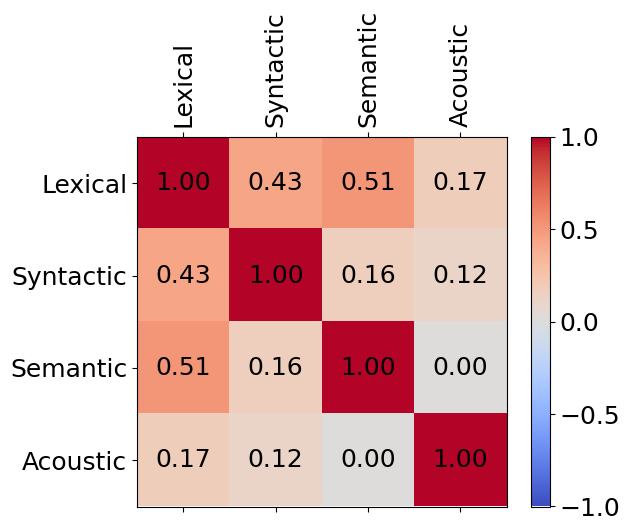

In [6]:
#Final Step 
## Program to find correlation between adjacent turns at lexical, syntactic, semantic and acoustic linguistic levels
## Find correlation using pearson correlation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_name=r'D:\Jay\hungarian_games_corpus\output\combined_output.csv'

df=pd.read_csv(file_name,delimiter=',')
df.rename(columns = {'Same_pair_lexical':'Lexical','Same_pair_syntactic':'Syntactic', 
                     'Same_pair_semantic':'Semantic', 'Same_pair_audio':'Acoustic'}, inplace = True)
group1=df[['Lexical','Syntactic','Semantic','Acoustic']]

corr = group1.corr()
corr
plt.rcParams.update({'font.size': 18})
ax.tick_params(axis='both', which='major', labelsize=14)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(group1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(group1.columns)
ax.set_yticklabels(group1.columns)
for (i, j), z in np.ndenumerate(corr):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
plt.show()
